## MNIST digit recognizer with CNN - Keras

####  1. IMPORTS

In [45]:
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split

### 2. Preprocessing Our Data

In [46]:
train_data = pd.read_csv('mnist_dataset_kaggle/train.csv')
test_data = pd.read_csv('mnist_dataset_kaggle/test.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


In [7]:
#Storing pixel array in form of length, width and channel
features = train_data.iloc[:, 1:].values.reshape(len(train_data), 28, 28, 1)

#Store the labels
labels = train_data.iloc[:, 0].values

features.shape

(42000, 28, 28, 1)

In [8]:
#converting labels to categorical features, One-hot encoding
labels = keras.utils.to_categorical(labels, num_classes=10)

In [9]:
#Converting our features and labels to numpy array 
features = np.array(features)
labels = np.array(labels)

In [10]:
#sample one-hot encoding view
print(labels)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [11]:
#lets see the final shape of our training features and labels
print(features.shape)
print(labels.shape)

(42000, 28, 28, 1)
(42000, 10)


In [12]:
#Train_Test_Split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20, random_state=1)

In [13]:
x_train.shape

(33600, 28, 28, 1)

In [14]:
x_test.shape

(8400, 28, 28, 1)

### 3. Creating Our Model

In [15]:
#Our Model

def LeNet(width, height, channels, output):
    model = Sequential()
    
    #Convulation
    model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), input_shape=(width, height, channels)))
    
    #ReLU Activation
    model.add(Activation('relu'))
    
    #Pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    
    #Convolution
    model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(2,2)))
    
    #ReLU Activation
    model.add(Activation('relu'))
    
    #Pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Flatten())
    
    #Hidden Layer
    model.add(Dense(100))
    
    model.add(Activation('relu'))
    
    model.add(Dense(output))
    
    model.add(Activation('softmax'))
    
    return model
    
    #We can also add dropout

In [43]:
model = LeNet(28, 28, 1, 10)

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
activation_2 (Activation)    (None, 2, 2, 64)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
__________

#### 4. Training Our Model

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [19]:
epochs = 30

In [17]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 5s 162us/step - loss: 2.7038 - acc: 0.7337 - val_loss: 1.8417 - val_acc: 0.8330
Epoch 2/30
33600/33600 [==============================] - 5s 156us/step - loss: 1.5948 - acc: 0.8504 - val_loss: 0.2800 - val_acc: 0.9185
Epoch 3/30
33600/33600 [==============================] - 5s 154us/step - loss: 0.2080 - acc: 0.9370 - val_loss: 0.1965 - val_acc: 0.9436
Epoch 4/30
33600/33600 [==============================] - 5s 153us/step - loss: 0.1460 - acc: 0.9555 - val_loss: 0.1903 - val_acc: 0.9442
Epoch 5/30
33600/33600 [==============================] - 5s 154us/step - loss: 0.1150 - acc: 0.9643 - val_loss: 0.1525 - val_acc: 0.9570
Epoch 6/30
33600/33600 [==============================] - 5s 160us/step - loss: 0.0979 - acc: 0.9696 - val_loss: 0.1525 - val_acc: 0.9576
Epoch 7/30
33600/33600 [==============================] - 5s 153us/step - loss: 0.0821 - acc: 0.9743 - val_loss: 0.1631 - v

In [18]:
#Saving Our Model
model.save_weights('cnn_mnist.h5')

In [20]:
#Loading Our Saved Model
model.load_weights('cnn_mnist.h5')

### 5. Testing

In [21]:
#our test data
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test_data.shape

(28000, 784)

In [23]:
test_set = test_data.iloc[:, :].values.reshape(len(test_data), 28, 28, 1)
test_set.shape

(28000, 28, 28, 1)

#### Testing Our whole testing dataset

In [41]:
prediction = model.predict(test_set)
prediction = np.argmax(prediction, axis=1)
prediction

array([2, 0, 9, ..., 3, 9, 2])

In [25]:
#for Kaggle: Writing prediction to CSV File
df = pd.DataFrame({
    'S.N.' : list(range(1,len(prediction)+1)),
    'Output' : prediction
})

df.to_csv("prediction.csv", index=False, header=True)

#### Testing single image(array) from testing set

In [37]:
#take third value of test set and reshaping it to test
test_x = test_data.iloc[2, :].values.reshape(1,28, 28, 1)
test_x.shape

(1, 28, 28, 1)

In [39]:
single_prediction = model.predict(test_x)
print("Your Predicted Number is: {}".format(np.argmax(single_prediction, axis=1)))

Your Predicted Number is: 9


#### Converting our testing single data to image for confirmation of our prediction

In [28]:
test_x = test_data.iloc[2, :].values
test_x.shape

(784,)

In [29]:
test_x = np.array(test_x)
test_x = test_x.reshape(28,28)
test_x.shape

(28, 28)

(28, 28)

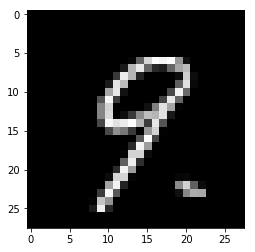

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(test_x, cmap='gray');
test_x.shape

In [32]:
#Prediction is right